In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [22]:
transform = transforms.Compose(
    [transforms.ToTensor(),
#      transforms.RandomHorizontalFlip(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./dataset/', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./dataset/', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [23]:
a = trainloader.__iter__().__next__()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


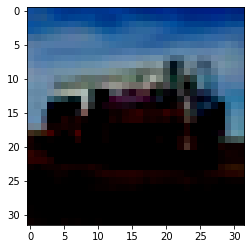

In [24]:
from matplotlib import pyplot as plt
plt.imshow(a[0][0,...].permute(1,2,0))

### Define Network

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 120])
torch.Size([4, 84])

In [29]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.conv3 = nn.Conv2d(20, 50, 3, padding=1)
        self.fc1 = nn.Linear(50 * 5 * 5, 600)
        self.fc2 = nn.Linear(600, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
#         print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))#[10, 14, 14]
#         print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))#[20, 5, 5]
        x = F.relu(self.conv3(x))#[50, 5, 5]
#         print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
#         print(x.shape)
        x = F.relu(self.fc1(x))
#         print(x.shape)
        x = F.relu(self.fc2(x))
#         print(x.shape)
        x = self.fc3(x)
        return x


net = Net()

### Define Loss Function

In [30]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the Network

In [33]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.416
[1,  4000] loss: 1.366
[1,  6000] loss: 1.329
[1,  8000] loss: 1.288
[1, 10000] loss: 1.283
[1, 12000] loss: 1.235
[2,  2000] loss: 1.184
[2,  4000] loss: 1.163
[2,  6000] loss: 1.131
[2,  8000] loss: 1.148
[2, 10000] loss: 1.136
[2, 12000] loss: 1.102
[3,  2000] loss: 1.037
[3,  4000] loss: 1.031
[3,  6000] loss: 1.039
[3,  8000] loss: 1.031
[3, 10000] loss: 1.050
[3, 12000] loss: 1.018
[4,  2000] loss: 0.948
[4,  4000] loss: 0.950
[4,  6000] loss: 0.959
[4,  8000] loss: 0.956
[4, 10000] loss: 0.949
[4, 12000] loss: 0.942
[5,  2000] loss: 0.874
[5,  4000] loss: 0.874
[5,  6000] loss: 0.882
[5,  8000] loss: 0.869
[5, 10000] loss: 0.877
[5, 12000] loss: 0.876
[6,  2000] loss: 0.815
[6,  4000] loss: 0.817
[6,  6000] loss: 0.804
[6,  8000] loss: 0.828
[6, 10000] loss: 0.806
[6, 12000] loss: 0.833
[7,  2000] loss: 0.749
[7,  4000] loss: 0.754
[7,  6000] loss: 0.749
[7,  8000] loss: 0.763
[7, 10000] loss: 0.795
[7, 12000] loss: 0.790
[8,  2000] loss: 0.686
[8,  4000] 

### Test Network

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

|epoch|acc|
|:----:|:----:|
|1|49%|
|2|54%|
|20|59%|